# Scatterplots of active region statistics: Cycle 24

### Preamble

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcol
import matplotlib.cm as cm
import itertools
import pandas as pd
from scipy import stats
%matplotlib inline 

# Font Size

font = {'family': 'sans-serif',
        'weight': 'normal',
        'size'   : 17}

plt.rc('font', **font)


A = np.fromfile('axcollect_c24_threecycles.dat',dtype=np.float32)
A = A.reshape(528,123)

N = np.fromfile('npole_c24_threecycles_decay.dat',dtype=np.float32)
N = N.reshape(528,123)

S = np.fromfile('spole_c24_threecycles_decay.dat',dtype=np.float32)
S = S.reshape(528,123)

axdipole2 = np.fromfile('axdipole2_c24_threecycles.dat',dtype=np.float32)
realaxdipole = np.fromfile('realaxdipole_c24.dat',dtype=np.float32)

start = []
start_npole = []
start_spole = []
begin = []
begin_npole = []
begin_spole = []

for i in range(528):
    index = np.nonzero(A[i,:])
    start.append(index[0][0])
    begin.append(A[i,start[i]])
    #index_npole = np.nonzero(A[i,:]);
    #start_npole.append(index_npole[0][0]);
    #begin_npole.append(N[i,start_npole[i]]);
    #index_spole = np.nonzero(S[i,:]);
    #start_spole.append(index_spole[0][0]);
    #begin_spole.append(S[i,start_spole[i]]);
    
start = np.asarray(start)
#start_npole = np.asarray(start_npole)
#start_spole = np.asarray(start_spole)
begin = np.asarray(begin)
#begin_npole = np.asarray(begin_npole)
#begin_spole = np.asarray(begin_spole)

final = A[:,122]
final[0] = 1e-7
begin[0] = 1e-7
begin_rel = begin/(axdipole2[122]-axdipole2[0])
final_rel = final/(axdipole2[122]-axdipole2[0])
#final_npole = N[:,122]
#final_spole = S[:,122]

total = []
#total_npole = []
#total_spole = []
for i in range(123):
    total.append(sum(A[:,i]))
    #total_npole.append(sum(N[:,i]))
    #total_spole.append(sum(S[:,i]))

thresh = 2.4e-2;
strong = np.asarray(np.where(abs(final)>thresh))
weak = np.asarray(np.where(abs(final)<thresh))
reg_percent = strong.size/528*100;
#print(reg_percent)

thresh_npole = 2.4e-2;
#strong_npole = np.asarray(np.where(abs(final_npole)>thresh_npole))
#weak_npole = np.asarray(np.where(abs(final_npole)<thresh_npole))
#reg_percent_npole = strong_npole.size/528*100;
#print(reg_percent_npole)

thresh_spole = 2.4e-2;
#strong_spole = np.asarray(np.where(abs(final_spole)>thresh_spole))
#weak_spole = np.asarray(np.where(abs(final_spole)<thresh_spole))
#reg_percent_spole = strong_spole.size/528*100;
#print(reg_percent_spole)

initflux = np.fromfile('initflux_c24_threecycles.dat',dtype=np.float32)
initflux2 = np.fromfile('initflux2_c24_threecycles.dat',dtype=np.float32)
reg_lat = np.fromfile('reg_lat_c24_threecycles.dat',dtype=np.float32)

a = [(initflux),(initflux2),(reg_lat),(start),(final_rel),(begin),(begin),(begin_rel),(final)]
a = np.asarray(a)
a = np.transpose(a)
b = sorted(a, key=lambda column: np.abs(column[4]))
b = np.transpose(b)

c = sorted(a, key=lambda column: np.abs(column[1]))
c = np.transpose(c)

d = sorted(a, key=lambda column: np.abs(column[2]))
d = np.transpose(d)

### Plots

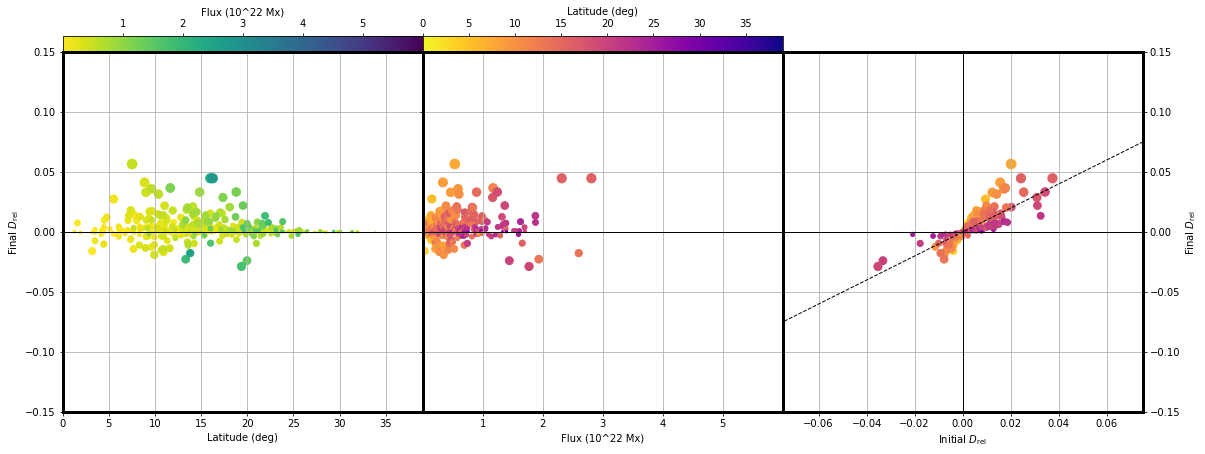

In [2]:
brown = (80/255,60/255,0)
green = (81/255,178/255,76/255)
blue = (114/255,178/255,229/255)
purple = (111/255,40/255,124/255)
peach = (1,208/255,171/255)
orange = (255/255,161/255,0)
pink = (255/255,105/255,180/255)
plum = (238/255,174/255,238/255)

dpi = 300
pxx = 1500  # Horizontal size of each panel
pxy = 1500    # Vertical size of each panel

nph = 1      # Number of horizontal panels
npv = 3      # Number of vertical panels

# Padding
padv  = 200 #Vertical padding in pixels at the edge of figure
padv2 = 0 #Vertical padding in pixels between panels
padh  = 450 #Horizontal padding in pixels at the edge of the figure
padh2 = 0 #Horizontal padding in pixels between panels

# Figure sizes in pixels
fszv = (npv*pxy + 2*padv + (npv-1)*padv2 )      #Vertical size of figure in inches
fszh = (nph*pxx + 2*padh + (nph-1)*padh2 )      #Horizontal size of figure in inches

# Conversion to relative units
ppadv  = padv/fszv     #Vertical padding in relative units
ppadv2 = padv2/fszv    #Vertical padding in relative units
ppadh  = padh/fszv     #Horizontal padding the edge of the figure in relative units
ppadh2 = padh2/fszv    #Horizontal padding between panels in relative units

## Start Figure
fig = plt.figure(figsize=(fszh/dpi,fszv/dpi))

# Latitude Limits
lat1 = 0
lat2 = 39

latticks = np.arange(lat1,lat2,5)

# Flux Limits
fl1 = 0
fl2 = 6

fluxticks = np.arange(1,fl2,1)

#Size Factor
szf = 400


# Add colorbar axes
cbaxes1 = fig.add_axes([ppadh, ppadv+pxy/fszv, pxx/fszh, ppadv/3])
cbaxes2 = fig.add_axes([ppadh+pxx/fszh, ppadv+pxy/fszv, pxx/fszh, ppadv/3])

# Latitude vs. Final Dipole
ax1 = fig.add_axes([ppadh, ppadv, pxx/fszh, pxy/fszv])
im1 = ax1.scatter(abs(c[2]),c[4],szf*np.sqrt(abs(c[4])),abs(c[1])/1e22,cmap='viridis_r',vmin=fl1,vmax=fl2)
ax1.set_xlabel('Latitude (deg)')
ax1.set_xlim(lat1,lat2)
plt.plot((lat1,lat2), (0, 0), 'k-',lw=1)
#ax1.set_title('Coloured by flux, sized by RFADM')
ax1.set_ylabel('Final $D_{\mathrm{rel}}$')
ax1.grid()
ax1.set_xticks(latticks)

# Flux vs. Final Dipole
ax2 = fig.add_axes([ppadh+pxx/fszh, ppadv, pxx/fszh, pxy/fszv], sharey=ax1)
ax2.scatter(abs(c[1])/1e22,c[4],szf*np.sqrt(abs(c[4])),abs(c[2]),cmap='plasma_r',vmin=lat1,vmax=lat2)
ax2.set_xlabel('Flux (10^22 Mx)')
plt.plot((fl1,fl2), (0, 0), 'k-',lw=1)
ax2.set_xlim(fl1,fl2)

#ax2.set_title('Coloured by time, sized by RFADM')
ax2.grid()
ax2.tick_params(labelleft=False) 
ax2.set_xticks(fluxticks)

# Initial Dipole vs. Final Dipole
ax3 = fig.add_axes([ppadh+pxx/fszh*2, ppadv, pxx/fszh, pxy/fszv], sharey=ax1)

im3 = ax3.scatter(c[7],c[4],szf*np.sqrt(abs(c[4])),abs(c[2]),cmap='plasma_r',vmin=lat1,vmax=lat2)
ax3.set_xlabel('Initial $D_{\mathrm{rel}}$')
#ax3.set_title('Coloured by flux, sized by RFADM')
ax3.set_xlim(-0.075,0.075)
plt.plot((-0.075,0.075), (0, 0), 'k-',lw=1)
plt.plot((-0.1,0.1), (-0.1,0.1), 'k--',lw=1)
plt.axvline(x=0,color='black',lw=1)
ax3.grid()
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position('right')
ax3.set_ylabel('Final $D_{\mathrm{rel}}$')

# Setting Vertical Axis
ax1.set_ylim(-0.15,0.15)




# Adding Flux Colorbar

cb1 = fig.colorbar(im1,cax=cbaxes1, orientation='horizontal')
cb1.set_label('Flux (10^22 Mx)')
cb1.set_ticks(ax2.get_xticks())
cbaxes1.xaxis.tick_top()
cbaxes1.xaxis.set_label_position('top')


# Adding Latitude Colorbar

cb2 = fig.colorbar(im3,cax=cbaxes2, orientation='horizontal')
cb2.set_label('Latitude (deg)')
cb2.set_ticks(latticks)
cbaxes2.xaxis.tick_top()
cbaxes2.xaxis.set_label_position('top')




# Making Spines Bolder

ax1.spines['bottom'].set_linewidth(3) 
ax1.spines['top'].set_linewidth(3)  
ax1.spines['right'].set_linewidth(3) 
ax1.spines['left'].set_linewidth(3) 

ax2.spines['bottom'].set_linewidth(3) 
ax2.spines['top'].set_linewidth(3)  
ax2.spines['right'].set_linewidth(3) 
ax2.spines['left'].set_linewidth(3) 

ax3.spines['bottom'].set_linewidth(3) 
ax3.spines['top'].set_linewidth(3)  
ax3.spines['right'].set_linewidth(3) 
ax3.spines['left'].set_linewidth(3) 


#plt.savefig('/home/grads/xsxs53/Documents/phd/Papers/regions_axd/c21_3panel_label.eps', format='eps', dpi=300,bbox_inches='tight')


3.4146128619485183 -6.180070063309956e-05 0.9881756422852576 9.183611207014612e-18 0.11847002595581717


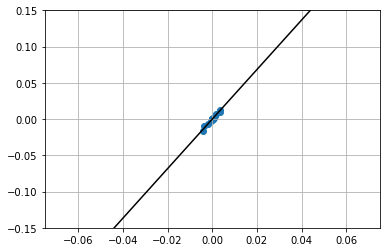

2.3956021647520385 0.00026968759332932643 0.9693976801738653 8.073776968531248e-44 0.07303517281615471


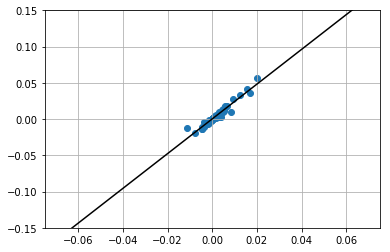

1.6478038743188301 -0.00024204903633112803 0.9579059848388097 4.1628895709549996e-82 0.04059362811932805


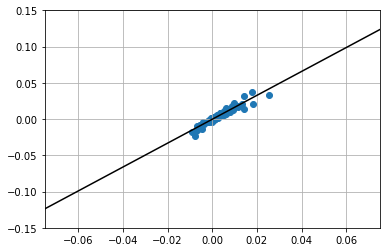

0.9517236190256406 0.00010081717413981195 0.9477125394050219 8.668727817828528e-78 0.025908943881596844


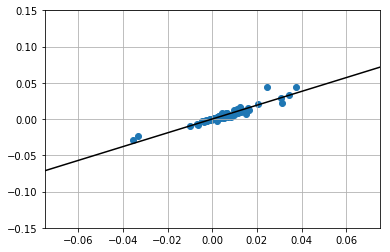

0.41263747078604973 8.098534276842952e-05 0.9751947109416712 2.0226020274258874e-59 0.009984195877166778


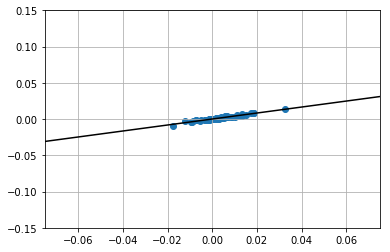

0.11286777683736322 3.325428638337893e-05 0.9605801937055831 1.1500984144519098e-17 0.006065783321615128


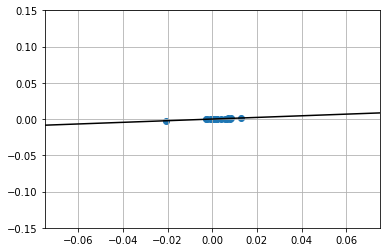

0.03764520099836042 5.774797309800162e-07 0.9020900274992912 0.0021775660299426054 0.007352128888092518


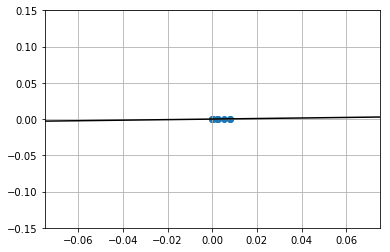

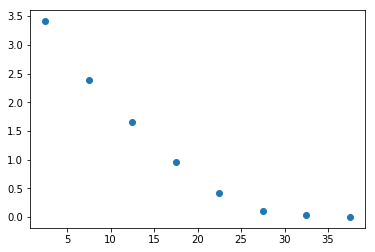

In [3]:
slope,intercept,rvalue,pvalue,stderr = stats.linregress(begin_rel[np.abs(reg_lat)<5],final_rel[np.abs(reg_lat)<5])
initials = np.linspace(-0.075,0.075,1000)

print(slope,intercept,rvalue,pvalue,stderr)

plt.scatter(begin_rel[np.abs(reg_lat)<5],final_rel[np.abs(reg_lat)<5])
plt.plot(initials,initials*slope + intercept,color="black")
plt.xlim(-0.075,0.075)
plt.ylim(-0.15,0.15)
plt.grid()
plt.show()



slope,intercept,rvalue,pvalue,stderr = stats.linregress(begin_rel[(np.abs(reg_lat)>=5) & (np.abs(reg_lat)<10)],final_rel[(np.abs(reg_lat)>=5) & (np.abs(reg_lat)<10)])
initials = np.linspace(-0.075,0.075,1000)

print(slope,intercept,rvalue,pvalue,stderr)

plt.scatter(begin_rel[(np.abs(reg_lat)>=5) & (np.abs(reg_lat)<10)],final_rel[(np.abs(reg_lat)>=5) & (np.abs(reg_lat)<10)])
plt.plot(initials,initials*slope + intercept,color="black")
plt.xlim(-0.075,0.075)
plt.ylim(-0.15,0.15)
plt.grid()
plt.show()



slope,intercept,rvalue,pvalue,stderr = stats.linregress(begin_rel[(np.abs(reg_lat)>=10) & (np.abs(reg_lat)<15)],final_rel[(np.abs(reg_lat)>=10) & (np.abs(reg_lat)<15)])
initials = np.linspace(-0.075,0.075,1000)

print(slope,intercept,rvalue,pvalue,stderr)

plt.scatter(begin_rel[(np.abs(reg_lat)>=10) & (np.abs(reg_lat)<15)],final_rel[(np.abs(reg_lat)>=10) & (np.abs(reg_lat)<15)])
plt.plot(initials,initials*slope + intercept,color="black")
plt.xlim(-0.075,0.075)
plt.ylim(-0.15,0.15)
plt.grid()
plt.show()



slope,intercept,rvalue,pvalue,stderr = stats.linregress(begin_rel[(np.abs(reg_lat)>=15) & (np.abs(reg_lat)<20)],final_rel[(np.abs(reg_lat)>=15) & (np.abs(reg_lat)<20)])
initials = np.linspace(-0.075,0.075,1000)

print(slope,intercept,rvalue,pvalue,stderr)

plt.scatter(begin_rel[(np.abs(reg_lat)>=15) & (np.abs(reg_lat)<20)],final_rel[(np.abs(reg_lat)>=15) & (np.abs(reg_lat)<20)])
plt.plot(initials,initials*slope + intercept,color="black")
plt.xlim(-0.075,0.075)
plt.ylim(-0.15,0.15)
plt.grid()
plt.show()



slope,intercept,rvalue,pvalue,stderr = stats.linregress(begin_rel[(np.abs(reg_lat)>=20) & (np.abs(reg_lat)<25)],final_rel[(np.abs(reg_lat)>=20) & (np.abs(reg_lat)<25)])
initials = np.linspace(-0.075,0.075,1000)

print(slope,intercept,rvalue,pvalue,stderr)

plt.scatter(begin_rel[(np.abs(reg_lat)>=20) & (np.abs(reg_lat)<25)],final_rel[(np.abs(reg_lat)>=20) & (np.abs(reg_lat)<25)])
plt.plot(initials,initials*slope + intercept,color="black")
plt.xlim(-0.075,0.075)
plt.ylim(-0.15,0.15)
plt.grid()
plt.show()



slope,intercept,rvalue,pvalue,stderr = stats.linregress(begin_rel[(np.abs(reg_lat)>=25) & (np.abs(reg_lat)<30)],final_rel[(np.abs(reg_lat)>=25) & (np.abs(reg_lat)<30)])
initials = np.linspace(-0.075,0.075,1000)

print(slope,intercept,rvalue,pvalue,stderr)

plt.scatter(begin_rel[(np.abs(reg_lat)>=25) & (np.abs(reg_lat)<30)],final_rel[(np.abs(reg_lat)>=25) & (np.abs(reg_lat)<30)])
plt.plot(initials,initials*slope + intercept,color="black")
plt.xlim(-0.075,0.075)
plt.ylim(-0.15,0.15)
plt.grid()
plt.show()



slope,intercept,rvalue,pvalue,stderr = stats.linregress(begin_rel[(np.abs(reg_lat)>=30) & (np.abs(reg_lat)<35)],final_rel[(np.abs(reg_lat)>=30) & (np.abs(reg_lat)<35)])
initials = np.linspace(-0.075,0.075,1000)

print(slope,intercept,rvalue,pvalue,stderr)

plt.scatter(begin_rel[(np.abs(reg_lat)>=30) & (np.abs(reg_lat)<35)],final_rel[(np.abs(reg_lat)>=30) & (np.abs(reg_lat)<35)])
plt.plot(initials,initials*slope + intercept,color="black")
plt.xlim(-0.075,0.075)
plt.ylim(-0.15,0.15)
plt.grid()
plt.show()

# Only one point above 35 degrees!

slopes = np.array([3.415,2.396,1.648,0.952,0.413,0.113,0.038,0])
ranges = np.arange(2.5,42.5,5)
plt.scatter(ranges,slopes)
plt.show()

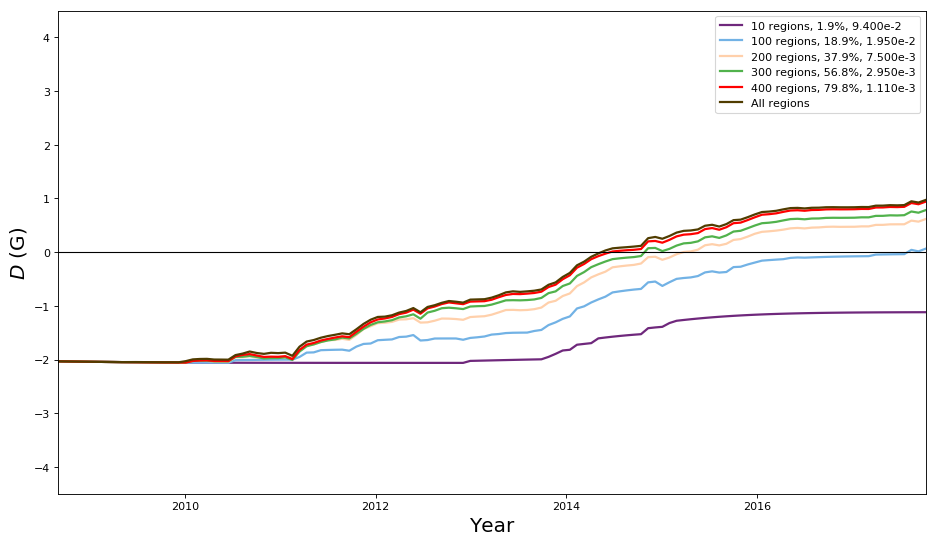

In [4]:
timeyear = (np.arange(1,124)*27.27+215)/365.25+2008

axdipole_10 = np.fromfile('axdipole_10_c24_threecycles.dat',dtype=np.float32)
axdipole_100 = np.fromfile('axdipole_100_c24_threecycles.dat',dtype=np.float32)
axdipole_200 = np.fromfile('axdipole_200_c24_threecycles.dat',dtype=np.float32)
axdipole_300 = np.fromfile('axdipole_300_c24_threecycles.dat',dtype=np.float32)
axdipole_400 = np.fromfile('axdipole_400_c24_threecycles.dat',dtype=np.float32)

fig2 = plt.figure(figsize=(14,8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(timeyear,axdipole_10,color=purple,lw=2,label='10 regions, 1.9%, 9.400e-2')
plt.plot(timeyear,axdipole_100,color=blue,lw=2,label='100 regions, 18.9%, 1.950e-2')
plt.plot(timeyear,axdipole_200,color=peach,lw=2,label='200 regions, 37.9%, 7.500e-3')
plt.plot(timeyear,axdipole_300,color=green,lw=2,label='300 regions, 56.8%, 2.950e-3')
plt.plot(timeyear,axdipole_400,'red',lw=2,label='400 regions, 79.8%, 1.110e-3')
plt.plot(timeyear,axdipole2,color=brown,lw=2,label='All regions')
plt.plot((timeyear[0],timeyear[122]), (0, 0), 'k-',lw=1)
plt.xlim(timeyear[0],timeyear[122])
plt.ylim(-4.5,4.5)
plt.xlabel('Year',fontsize=18)
plt.ylabel('$D$ (G)',fontsize=18)
plt.legend()
plt.show()

#plt.savefig('/home/grads/xsxs53/Documents/phd/Papers/regions_axd/c21_5profiles.eps', format='eps', dpi=300,bbox_inches='tight')

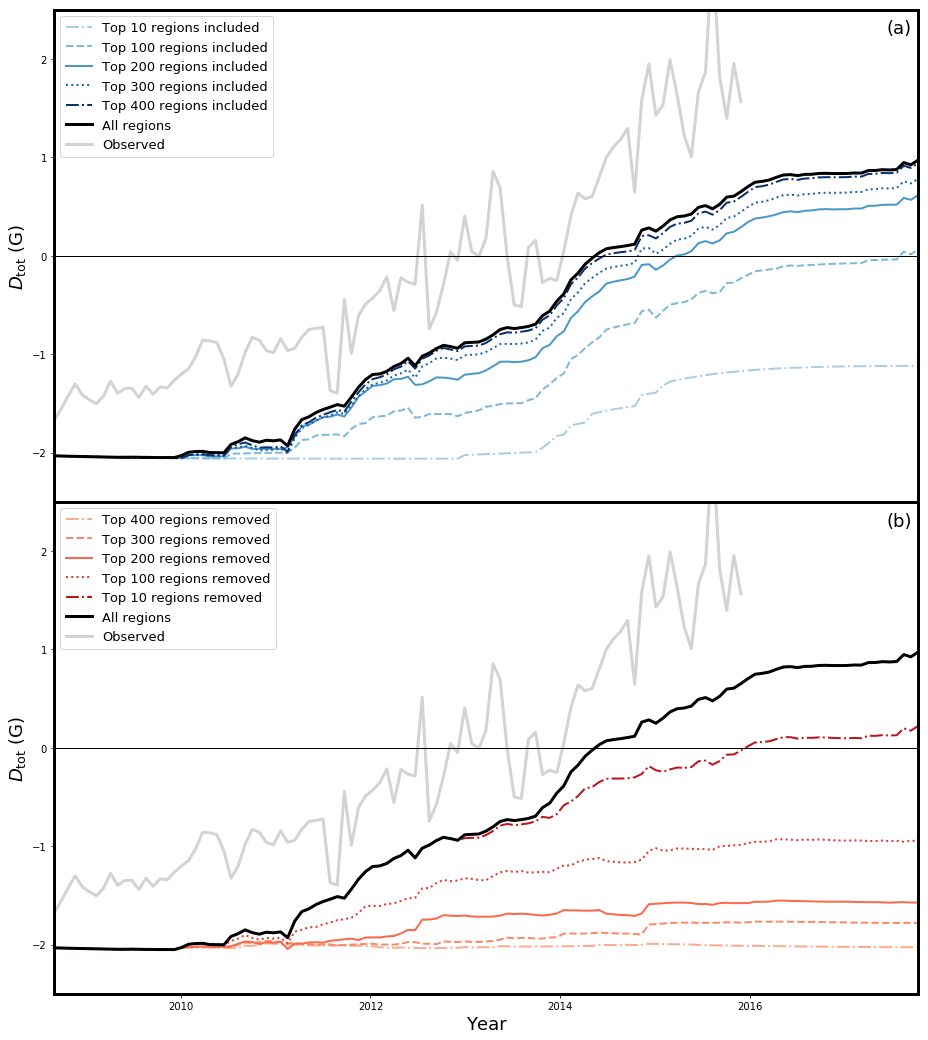

In [5]:
timeyear_c24 = (np.arange(1,124)*27.27+215)/365.25+2008
timeyear_short = (np.arange(1,99)*27.27+215)/365.25+2008

dpi = 300
pxx = 3600  # Horizontal size of each panel
pxy = 2050    # Vertical size of each panel

nph = 2      # Number of horizontal panels
npv = 1      # Number of vertical panels

# Padding
padv  = 200 #Vertical padding in pixels at the edge of figure
padv2 = 0 #Vertical padding in pixels between panels
padh  = 450 #Horizontal padding in pixels at the edge of the figure
padh2 = 0 #Horizontal padding in pixels between panels

# Figure sizes in pixels
fszv = (npv*pxy + 2*padv + (npv-1)*padv2 )      #Vertical size of figure in inches
fszh = (nph*pxx + 2*padh + (nph-1)*padh2 )      #Horizontal size of figure in inches

# Conversion to relative units
ppadv  = padv/fszv     #Vertical padding in relative units
ppadv2 = padv2/fszv    #Vertical padding in relative units
ppadh  = padh/fszv     #Horizontal padding the edge of the figure in relative units
ppadh2 = padh2/fszv    #Horizontal padding between panels in relative units

## Start Figure
fig = plt.figure(figsize=(fszh/dpi,fszv/dpi))

axdipole2_c24 = np.fromfile('axdipole2_c24_threecycles.dat',dtype=np.float32)
axdipole_10_c24 = np.fromfile('axdipole_10_c24_threecycles.dat',dtype=np.float32)
axdipole_100_c24 = np.fromfile('axdipole_100_c24_threecycles.dat',dtype=np.float32)
axdipole_200_c24 = np.fromfile('axdipole_200_c24_threecycles.dat',dtype=np.float32)
axdipole_300_c24 = np.fromfile('axdipole_300_c24_threecycles.dat',dtype=np.float32)
axdipole_400_c24 = np.fromfile('axdipole_400_c24_threecycles.dat',dtype=np.float32)

ax1 = fig.add_axes([ppadh, ppadv, pxx/fszh, pxy/fszv])
ax1.plot(timeyear_c24,axdipole_10_c24,color=cm.Blues(0.35),linestyle='-.',lw=2,label='Top 10 regions included')
ax1.plot(timeyear_c24,axdipole_100_c24,color=cm.Blues(0.45),linestyle='--',lw=2,label='Top 100 regions included')
ax1.plot(timeyear_c24,axdipole_200_c24,color=cm.Blues(0.6),lw=2,label='Top 200 regions included')
ax1.plot(timeyear_c24,axdipole_300_c24,color=cm.Blues(0.8),linestyle=':',lw=2,label='Top 300 regions included')
ax1.plot(timeyear_c24,axdipole_400_c24,color=cm.Blues(1.0),linestyle='-.',lw=2,label='Top 400 regions included')
ax1.plot(timeyear_c24,axdipole2_c24,color='black',lw=3,label='All regions')

ax1.plot((timeyear_c24[0],timeyear_c24[122]), (0, 0), 'k-',lw=1)
ax1.plot(timeyear_short,realaxdipole,color='lightgrey',lw=3,zorder=0,label='Observed')
ax1.set_xlim(timeyear_c24[0],timeyear_c24[122])
ax1.set_ylim(-2.5,2.5)
ax1.set_ylabel('$D_{\mathrm{tot}}$ (G)',fontsize=18)
ax1.legend(fontsize=13,loc=2)



axdipole_10_c24 = np.fromfile('axdipole_reverse_10_c24.dat',dtype=np.float32)
axdipole_100_c24 = np.fromfile('axdipole_reverse_100_c24.dat',dtype=np.float32)
axdipole_200_c24 = np.fromfile('axdipole_reverse_200_c24.dat',dtype=np.float32)
axdipole_300_c24 = np.fromfile('axdipole_reverse_300_c24.dat',dtype=np.float32)
axdipole_400_c24 = np.fromfile('axdipole_reverse_400_c24.dat',dtype=np.float32)

ax2 = fig.add_axes([ppadh, ppadv-pxy/fszv, pxx/fszh, pxy/fszv], sharex=ax1)
ax2.plot(timeyear_c24,axdipole_400_c24,color=cm.Reds(0.3),linestyle='-.',lw=2,label='Top 400 regions removed')
ax2.plot(timeyear_c24,axdipole_300_c24,color=cm.Reds(0.4),linestyle='--',lw=2,label='Top 300 regions removed')
ax2.plot(timeyear_c24,axdipole_200_c24,color=cm.Reds(0.5),lw=2,label='Top 200 regions removed')
ax2.plot(timeyear_c24,axdipole_100_c24,color=cm.Reds(0.65),linestyle=':',lw=2,label='Top 100 regions removed')
ax2.plot(timeyear_c24,axdipole_10_c24,color=cm.Reds(0.8),linestyle='-.',lw=2,label='Top 10 regions removed')
ax2.plot(timeyear_c24,axdipole2_c24,color='black',lw=3,label='All regions')

ax2.plot(timeyear_short,realaxdipole,color='lightgrey',lw=3,zorder=0,label='Observed')
ax2.plot((timeyear_c24[0],timeyear_c24[122]), (0, 0), 'k-',lw=1)
ax2.set_xlim(timeyear_c24[0],timeyear_c24[122])
ax2.set_ylim(-2.5,2.5)
ax2.set_xlabel('Year',fontsize=18)
ax2.set_ylabel('$D_{\mathrm{tot}}$ (G)',fontsize=18)
ax2.legend(fontsize=13,loc=2)
fig.text(0.612,0.878,'(a)',fontsize=18)
fig.text(0.612,0.04,'(b)',fontsize=18)

ax1.spines['bottom'].set_linewidth(3) 
ax1.spines['top'].set_linewidth(3)  
ax1.spines['right'].set_linewidth(3) 
ax1.spines['left'].set_linewidth(3)
ax2.spines['bottom'].set_linewidth(3) 
ax2.spines['top'].set_linewidth(3)  
ax2.spines['right'].set_linewidth(3) 
ax2.spines['left'].set_linewidth(3)

#plt.savefig('/home/grads/xsxs53/Documents/phd/Papers/regions_axd/5profiles_obs_both.eps', format='eps', dpi=300,bbox_inches='tight')

/usr/lib64/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


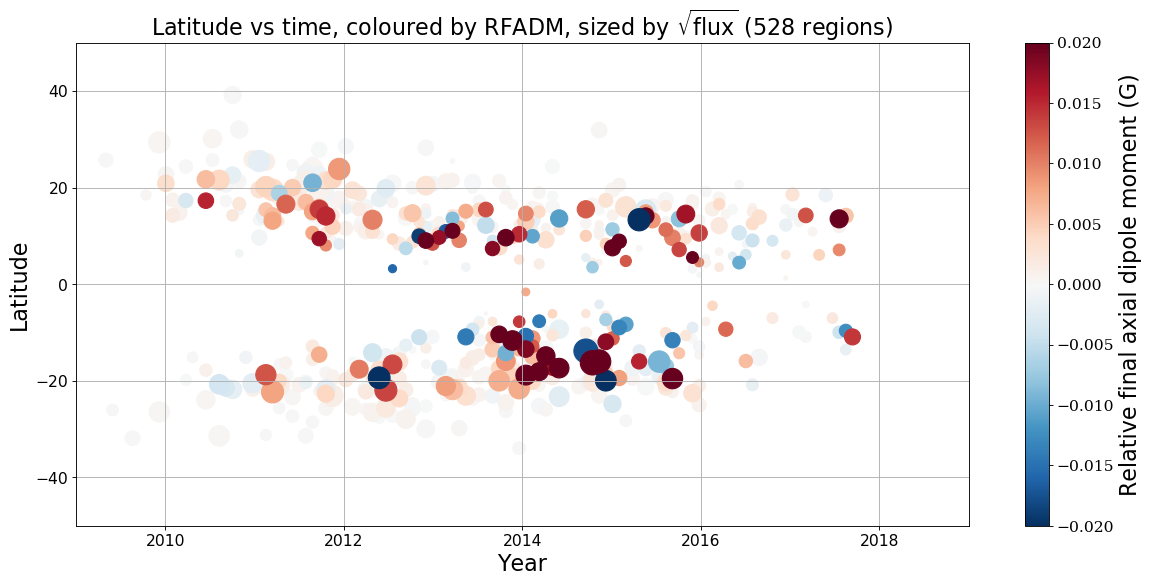

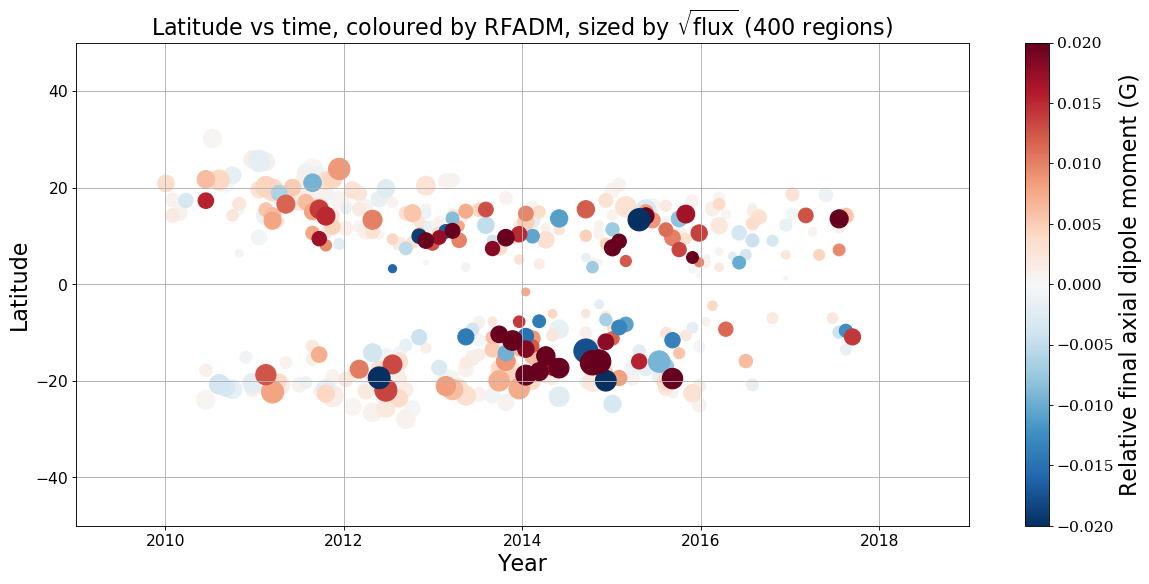

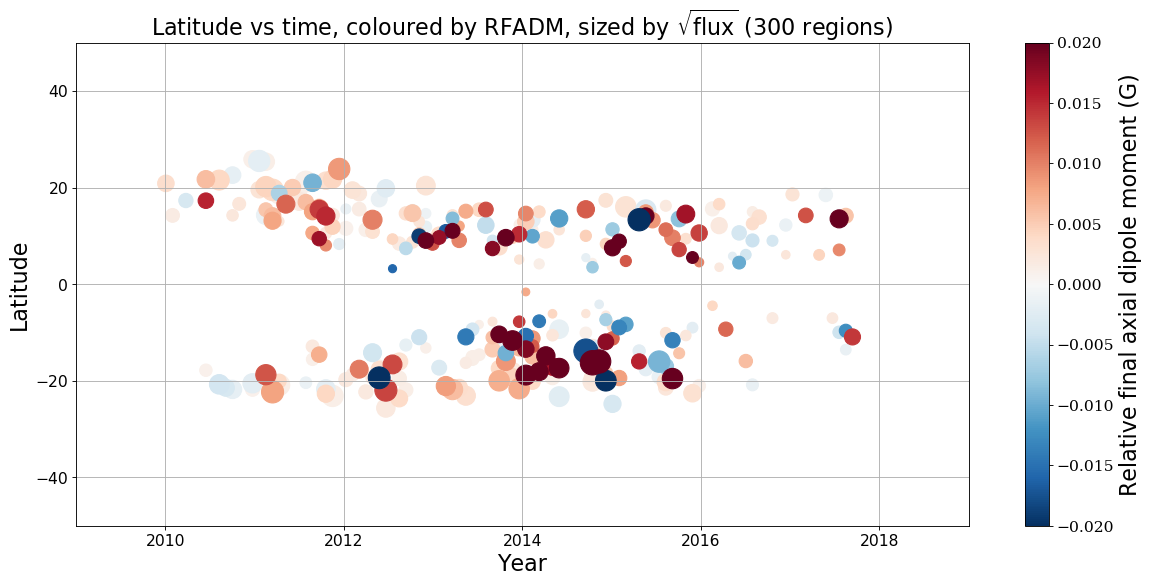

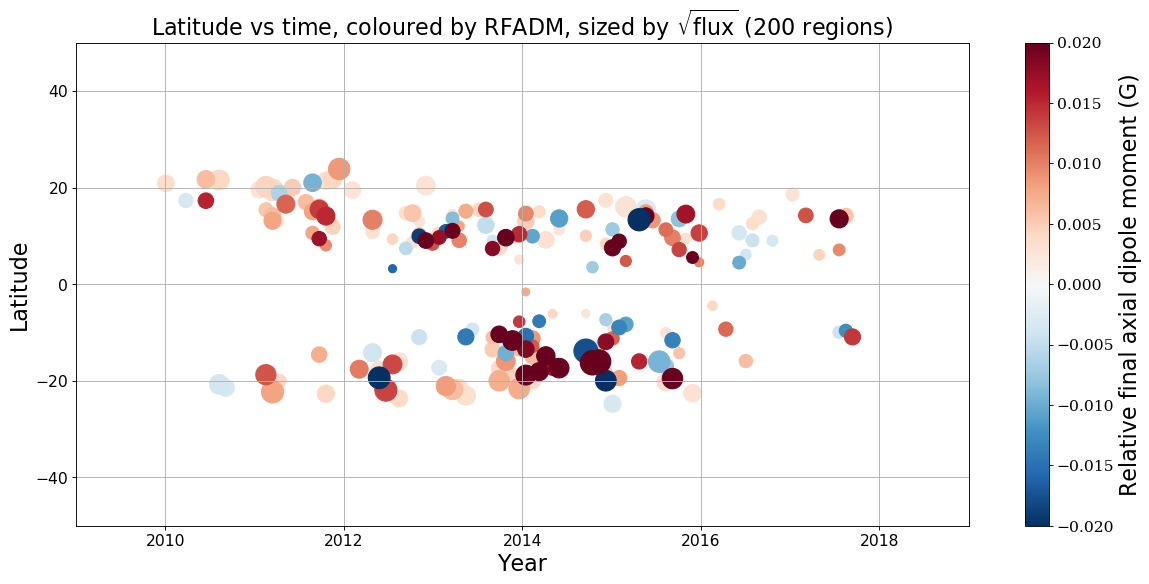

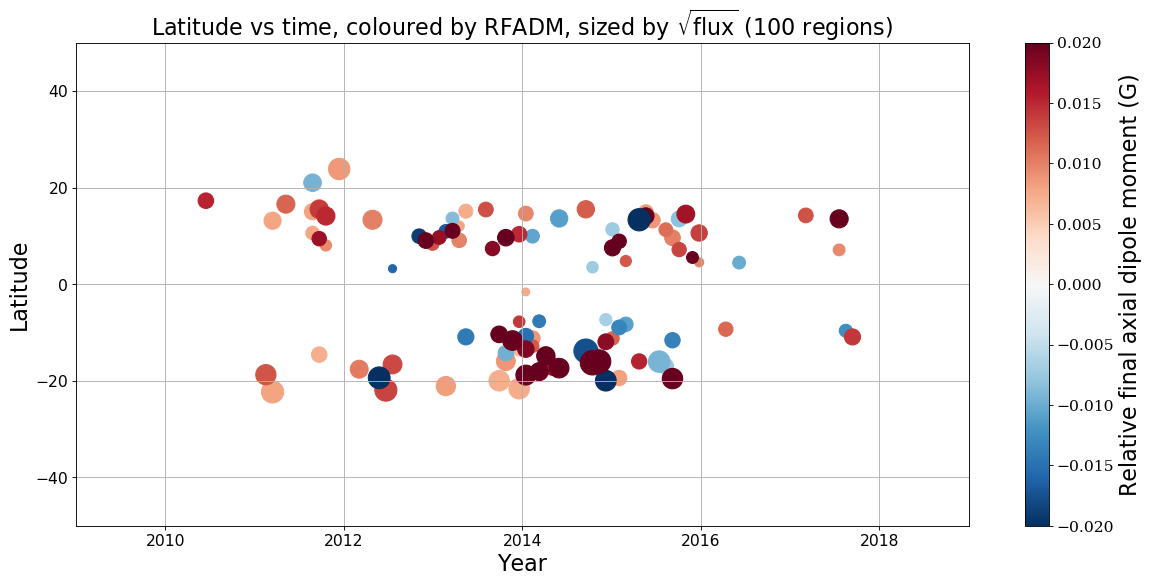

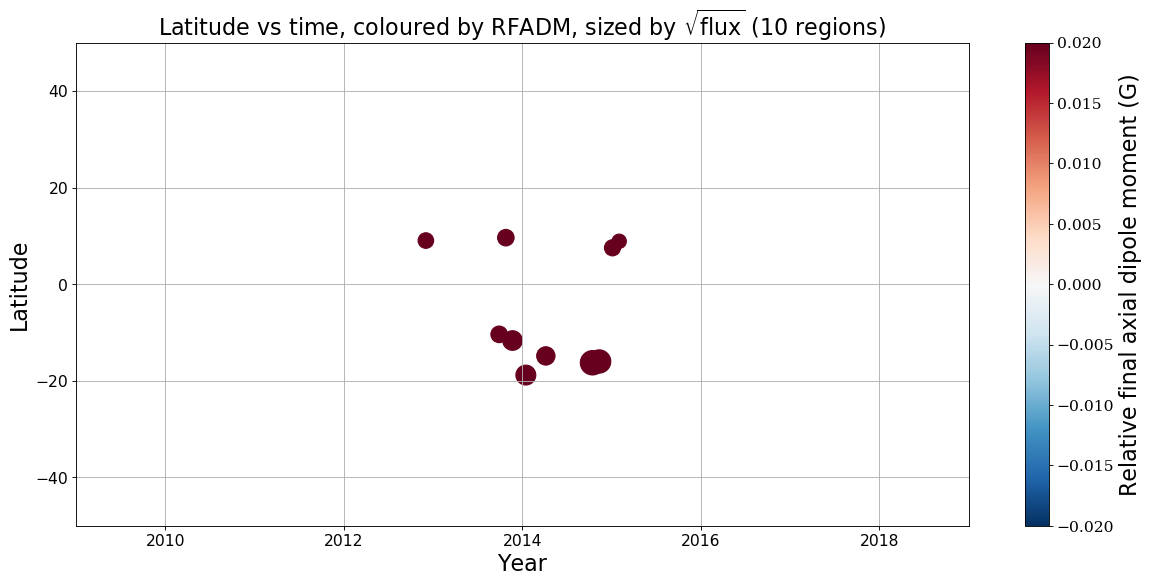

In [6]:
fig2 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter((b[3]*27.27+215)/365.25+2008,b[2],200*np.sqrt(abs(b[0])),b[4],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
cb_label = 'Relative final axial dipole moment (G)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(2009,2019)
plot = fig2.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Latitude vs time, coloured by RFADM, sized by $\sqrt{\mathrm{flux}}$ (528 regions)',fontsize=20)
plt.grid()
plt.show()


thresh = 1.11e-3;
strong2 = np.asarray(np.where(abs(b[8])>thresh))
weak = np.asarray(np.where(abs(b[8])<thresh))
reg_percent = strong2.size/528*100;
#print(strong2.size)

fig = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter((b[3][strong2]*27.27+215)/365.25+2008,b[2][strong2],200*np.sqrt(abs(b[0][strong2])),b[4][strong2],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
cb_label = 'Relative final axial dipole moment (G)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(2009,2019)
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Latitude vs time, coloured by RFADM, sized by $\sqrt{\mathrm{flux}}$ (400 regions)',fontsize=20)
plt.grid()
plt.show()

        
thresh = 2.95e-3;
strong3 = np.asarray(np.where(abs(b[8])>thresh))
weak = np.asarray(np.where(abs(b[8])<thresh))
reg_percent = strong3.size/528*100;
#print(strong3.size)

fig = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter((b[3][strong3]*27.27+215)/365.25+2008,b[2][strong3],200*np.sqrt(abs(b[0][strong3])),b[4][strong3],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
cb_label = 'Relative final axial dipole moment (G)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(2009,2019)
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Latitude vs time, coloured by RFADM, sized by $\sqrt{\mathrm{flux}}$ (300 regions)',fontsize=20)
plt.grid()
plt.show()


thresh = 7.5e-3;
strong4 = np.asarray(np.where(abs(b[8])>thresh))
weak = np.asarray(np.where(abs(b[8])<thresh))
reg_percent = strong4.size/528*100;
#print(strong4.size)

fig = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter((b[3][strong4]*27.27+215)/365.25+2008,b[2][strong4],200*np.sqrt(abs(b[0][strong4])),b[4][strong4],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
cb_label = 'Relative final axial dipole moment (G)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(2009,2019)
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Latitude vs time, coloured by RFADM, sized by $\sqrt{\mathrm{flux}}$ (200 regions)',fontsize=20)
plt.grid()
plt.show()


thresh = 1.95e-2;
strong5 = np.asarray(np.where(abs(b[8])>thresh))
weak = np.asarray(np.where(abs(b[8])<thresh))
reg_percent = strong5.size/528*100;
#print(strong5.size)

fig6 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter((b[3][strong5]*27.27+215)/365.25+2008,b[2][strong5],200*np.sqrt(abs(b[0][strong5])),b[4][strong5],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
cb_label = 'Relative final axial dipole moment (G)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(2009,2019)
plot = fig6.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Latitude vs time, coloured by RFADM, sized by $\sqrt{\mathrm{flux}}$ (100 regions)',fontsize=20)
plt.grid()
plt.show()


thresh = 9.4e-2;
strong6 = np.asarray(np.where(abs(b[8])>thresh))
weak = np.asarray(np.where(abs(b[8])<thresh))
reg_percent = strong6.size/528*100;
#print(strong6.size)

fig6 = plt.figure(figsize=(18,8), dpi= 80, facecolor='w', edgecolor='k')
plt.scatter((b[3][strong6]*27.27+215)/365.25+2008,b[2][strong6],200*np.sqrt(abs(b[0][strong6])),b[4][strong6],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
cb_label = 'Relative final axial dipole moment (G)'
cb = plt.colorbar()
cb.set_label(cb_label, fontsize=20)
cbytick_obj = plt.getp(cb.ax.axes, 'yticklabels')
plt.setp(cbytick_obj, fontsize=14, family='serif')
plt.ylim(-50,50)
plt.xlim(2009,2019)
plot = fig6.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=14)
plot.tick_params(axis='both', which='minor', labelsize=10)
plt.ylabel('Latitude',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.title('Latitude vs time, coloured by RFADM, sized by $\sqrt{\mathrm{flux}}$ (10 regions)',fontsize=20)
plt.grid()
plt.show()

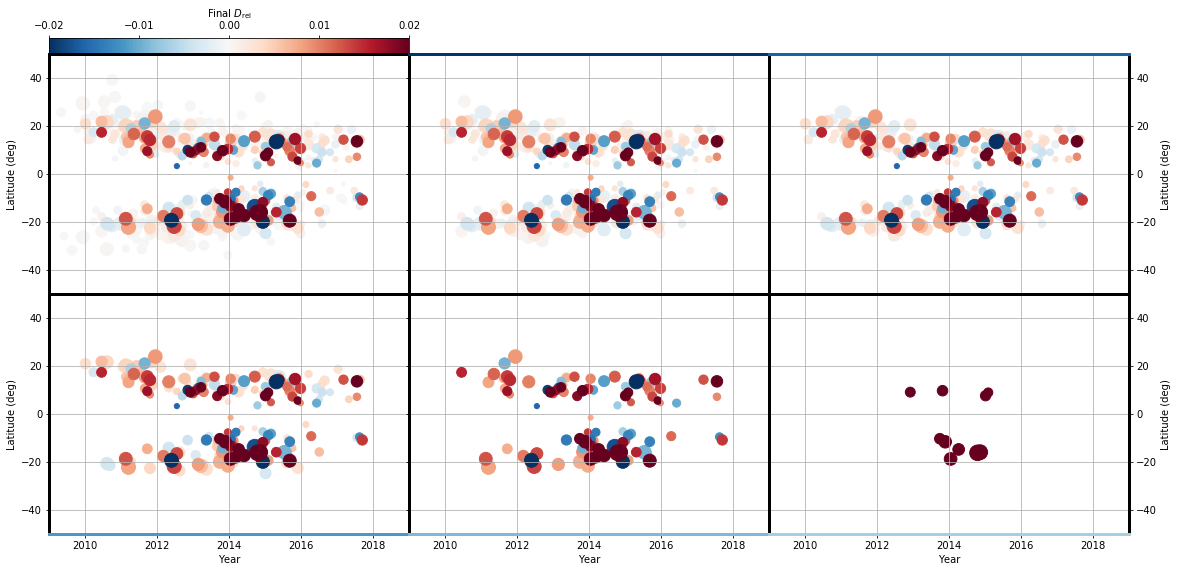

In [7]:
dpi = 300
pxx = 1500  # Horizontal size of each panel
pxy = 1000    # Vertical size of each panel

nph = 2      # Number of horizontal panels
npv = 3      # Number of vertical panels

# Padding
padv  = 200 #Vertical padding in pixels at the edge of figure
padv2 = 0 #Vertical padding in pixels between panels
padh  = 450 #Horizontal padding in pixels at the edge of the figure
padh2 = 0 #Horizontal padding in pixels between panels

# Figure sizes in pixels
fszv = (npv*pxy + 2*padv + (npv-1)*padv2 )      #Vertical size of figure in inches
fszh = (nph*pxx + 2*padh + (nph-1)*padh2 )      #Horizontal size of figure in inches

# Conversion to relative units
ppadv  = padv/fszv     #Vertical padding in relative units
ppadv2 = padv2/fszv    #Vertical padding in relative units
ppadh  = padh/fszv     #Horizontal padding the edge of the figure in relative units
ppadh2 = padh2/fszv    #Horizontal padding between panels in relative units

## Start Figure
fig = plt.figure(figsize=(fszh/dpi,fszv/dpi))


yearticks = np.arange(2010,2020,2)
radmticks = np.arange(-0.02,0.03,0.01)


#Size Factor
szf = 400


# Add colorbar axes
cbaxes1 = fig.add_axes([ppadh, ppadv+pxy/fszv, pxx/fszh, ppadv/3])

# Panel 1
ax1 = fig.add_axes([ppadh, ppadv, pxx/fszh, pxy/fszv])
im1 = plt.scatter((b[3]*27.27+215)/365.25+2008,b[2],100*np.sqrt(abs(b[0])),b[4],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
ax1.set_xlabel('Year')
ax1.set_xlim(2009,2019)
ax1.set_ylabel('Latitude (deg)')
ax1.tick_params(labelbottom=False)
ax1.grid()

# Panel 2
ax2 = fig.add_axes([ppadh+pxx/fszh, ppadv, pxx/fszh, pxy/fszv], sharey=ax1)
im2 = plt.scatter((b[3][strong2]*27.27+215)/365.25+2008,b[2][strong2],100*np.sqrt(abs(b[0][strong2])),b[4][strong2],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
ax2.set_xlim(2009,2019)
ax2.set_ylim(-50,50)
ax2.grid()
ax2.tick_params(labelleft=False)
ax2.tick_params(labelbottom=False)


# Panel 3
ax3 = fig.add_axes([ppadh+pxx/fszh*2, ppadv, pxx/fszh, pxy/fszv], sharey=ax1)
im3 = plt.scatter((b[3][strong3]*27.27+215)/365.25+2008,b[2][strong3],100*np.sqrt(abs(b[0][strong3])),b[4][strong3],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
ax3.grid()
ax3.yaxis.tick_right()
ax3.yaxis.set_label_position('right')
ax3.set_ylabel('Latitude (deg)')
ax3.tick_params(labelbottom=False)


ax1.set_ylim(-50,50)


# Panel 4
ax4 = fig.add_axes([ppadh, ppadv-pxy/fszv, pxx/fszh, pxy/fszv], sharex=ax1)
im4 = plt.scatter((b[3][strong4]*27.27+215)/365.25+2008,b[2][strong4],100*np.sqrt(abs(b[0][strong4])),b[4][strong4],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
ax4.set_xlabel('Year')
ax4.set_xlim(2009,2019)
ax4.set_ylabel('Latitude (deg)')
ax4.grid()
ax4.set_xticks(yearticks)

# Panel 5
ax5 = fig.add_axes([ppadh+pxx/fszh, ppadv-pxy/fszv, pxx/fszh, pxy/fszv], sharey=ax4, sharex=ax2)
im5 = plt.scatter((b[3][strong5]*27.27+215)/365.25+2008,b[2][strong5],100*np.sqrt(abs(b[0][strong5])),b[4][strong5],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
ax5.set_xlabel('Year')
ax5.set_xlim(2009,2019)
ax5.grid()
ax5.tick_params(labelleft=False) 
ax5.set_xticks(yearticks)

# Panel 6
ax6 = fig.add_axes([ppadh+pxx/fszh*2, ppadv-pxy/fszv, pxx/fszh, pxy/fszv], sharey=ax4, sharex=ax3)
im6 = plt.scatter((b[3][strong6]*27.27+215)/365.25+2008,b[2][strong6],100*np.sqrt(abs(b[0][strong6])),b[4][strong6],cmap='RdBu_r',vmin=-0.02,vmax=0.02)
ax6.set_xlabel('Year')
ax6.set_xlim(2009,2019)
ax6.grid()
ax6.yaxis.tick_right()
ax6.yaxis.set_label_position('right')
ax6.set_ylabel('Latitude (deg)')
ax6.set_xticks(yearticks)



ax4.set_ylim(-50,50)




# Adding Flux Colorbar

cb1 = fig.colorbar(im1,cax=cbaxes1, orientation='horizontal')
cb1.set_label('Final $D_{\mathrm{rel}}$')
cb1.set_ticks(radmticks)
cbaxes1.xaxis.tick_top()
cbaxes1.xaxis.set_label_position('top')




# Making Spines Bolder

ax1.spines['bottom'].set_linewidth(3) 
ax1.spines['top'].set_linewidth(3)  
ax1.spines['right'].set_linewidth(3) 
ax1.spines['left'].set_linewidth(3)
ax1.spines['top'].set_color('k')

ax2.spines['bottom'].set_linewidth(3) 
ax2.spines['top'].set_linewidth(3)  
ax2.spines['right'].set_linewidth(3) 
ax2.spines['left'].set_linewidth(3)
ax2.spines['top'].set_color(cm.Blues(1.0))

ax3.spines['bottom'].set_linewidth(3) 
ax3.spines['top'].set_linewidth(3)  
ax3.spines['right'].set_linewidth(3) 
ax3.spines['left'].set_linewidth(3)
ax3.spines['top'].set_color(cm.Blues(0.8))

ax4.spines['bottom'].set_linewidth(3) 
ax4.spines['top'].set_linewidth(3)  
ax4.spines['right'].set_linewidth(3) 
ax4.spines['left'].set_linewidth(3)
ax4.spines['bottom'].set_color(cm.Blues(0.6))

ax5.spines['bottom'].set_linewidth(3) 
ax5.spines['top'].set_linewidth(3)  
ax5.spines['right'].set_linewidth(3) 
ax5.spines['left'].set_linewidth(3)
ax5.spines['bottom'].set_color(cm.Blues(0.45))

ax6.spines['bottom'].set_linewidth(3) 
ax6.spines['top'].set_linewidth(3)  
ax6.spines['right'].set_linewidth(3) 
ax6.spines['left'].set_linewidth(3)
ax6.spines['bottom'].set_color(cm.Blues(0.35))


#plt.savefig('/home/grads/xsxs53/Documents/phd/Papers/regions_axd/c21_6panel.eps', format='eps', dpi=300,bbox_inches='tight')

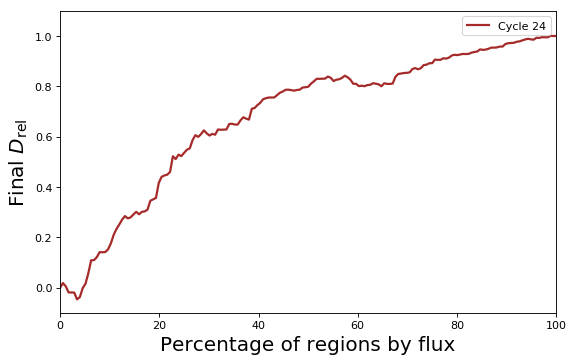

In [10]:
axd_fluxpercent_c24 = np.fromfile('axcollect_fluxpercent_c24_threecycles.dat',dtype=np.float32)
axd_fluxpercent_c24 = np.insert(axd_fluxpercent_c24,0,0)

fig7 = plt.figure(figsize=(8,5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(np.arange(0,529,3)*100/528,axd_fluxpercent_c24,color='brown',lw=2,label='Cycle 24')
plt.xlim(0,100)
plt.ylim(-0.1,1.1)
plt.xlabel('Percentage of regions by flux',fontsize=18)
plt.ylabel('Final $D_{\mathrm{rel}}$',fontsize=18)
plt.legend()
plt.show()

#plt.savefig('/home/grads/xsxs53/Documents/phd/Papers/regions_axd/reg_percent_threecycles.eps', format='eps', dpi=300,bbox_inches='tight')